In [ ]:
#Chuyển đến thư mục cần xử lí
%cd /content/drive/MyDrive/AI/10VietnameseDishes/

/content/drive/MyDrive/AI/10VietnameseDishes


In [ ]:
#Import các thư viện liên quan cần sử dụng
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Thư viện tạo mô hình CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical # one hot encoding

#Thư viện vẽ đồ thị
from matplotlib import pyplot as plt 

from sklearn import preprocessing
from tensorflow.keras.models import load_model
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np

train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu chứa dữ liệu dùng để training
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/10VietnameseDishes/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 3243 images belonging to 10 classes.


In [ ]:
# Lấy ra tên của từng thư mục chứa từng loại dữ liệu
training_set.class_indices

{'Banh bot loc': 0,
 'Banh chung': 1,
 'Banh mi': 2,
 'Banh trang nuong': 3,
 'Banh xeo': 4,
 'Bun bo Hue': 5,
 'Bun dau mam tom': 6,
 'Com tam': 7,
 'Nem chua': 8,
 'Xoi xeo': 9}

In [ ]:
#Define và compile CNN model
model=Sequential()

# Nhân tích chập 32 lần
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 64 lần 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 128 lần 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
#Complie mô hình CNN
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Lưu lại giá trị mỗi lần học để vẽ ra đồ thị
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
102/102 [==============================] - 73s 689ms/step - loss: 0.0777 - accuracy: 0.9790
Epoch 2/50
102/102 [==============================] - 71s 696ms/step - loss: 0.0694 - accuracy: 0.9790
Epoch 3/50
102/102 [==============================] - 71s 694ms/step - loss: 0.0759 - accuracy: 0.9769
Epoch 4/50
102/102 [==============================] - 71s 696ms/step - loss: 0.0749 - accuracy: 0.9726
Epoch 5/50
102/102 [==============================] - 71s 692ms/step - loss: 0.0699 - accuracy: 0.9778
Epoch 6/50
102/102 [==============================] - 71s 693ms/step - loss: 0.0577 - accuracy: 0.9815
Epoch 7/50
102/102 [==============================] - 70s 687ms/step - loss: 0.0728 - accuracy: 0.9781
Epoch 8/50
102/102 [==============================] - 70s 682ms/step - loss: 0.0627 - accuracy: 0.9793
Epoch 9/50
102/102 [==============================] - 70s 686ms/step - loss: 0.0501 - accuracy: 0.9852
Epoch 10/50
102/102 [==============================] - 71s 697ms/step - l

In [ ]:
#Độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.06217552348971367
Train Accuracy 0.9796484708786011


<function matplotlib.pyplot.show(close=None, block=None)>

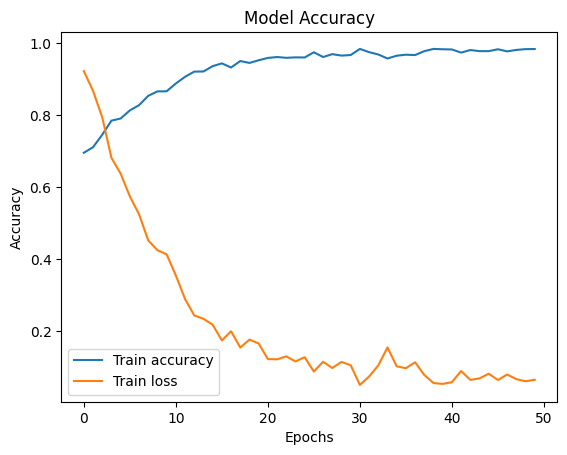

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy','Train loss'])
plt.show

In [ ]:
# Lưu lại dữ liệu sau khi train
model.save("10dishes.h5")

In [ ]:
#Load mô hình đã lưu
model_CNN=load_model('10dishes.h5')

1/1 [==============================] - 0s 222ms/step
Banh mi


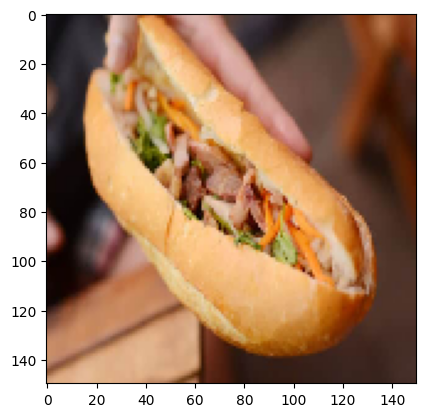

1/1 [==============================] - 0s 19ms/step
Banh trang nuong


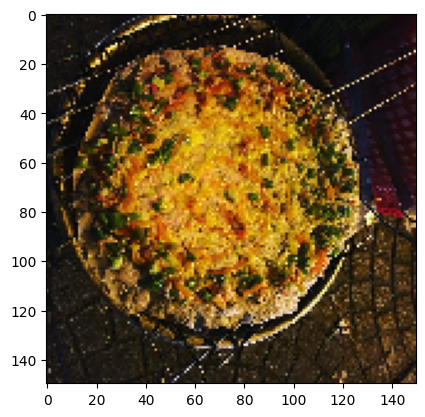

1/1 [==============================] - 0s 18ms/step
Banh trang nuong


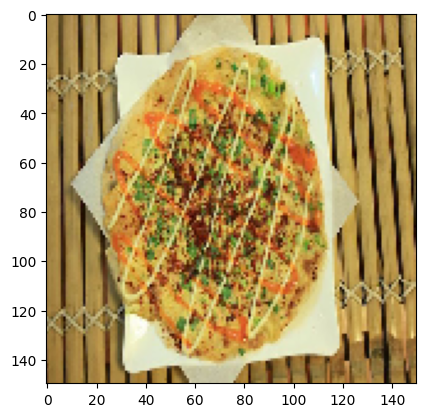

1/1 [==============================] - 0s 20ms/step
Banh trang nuong


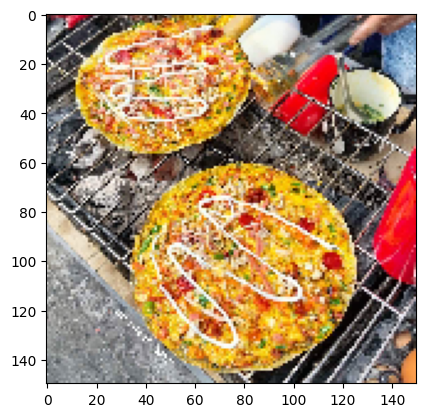

1/1 [==============================] - 0s 18ms/step
Banh trang nuong


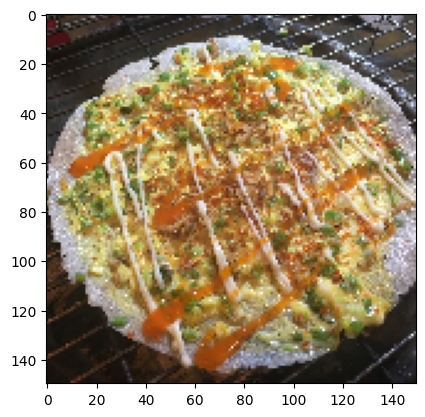

1/1 [==============================] - 0s 31ms/step
Banh xeo


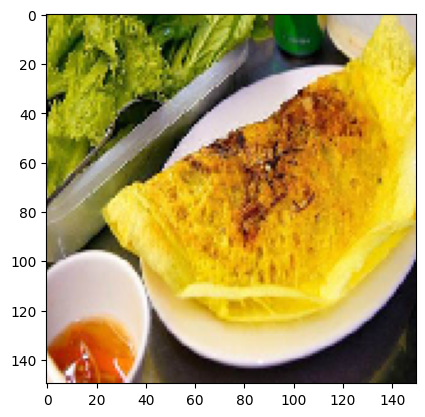

1/1 [==============================] - 0s 21ms/step
Banh xeo


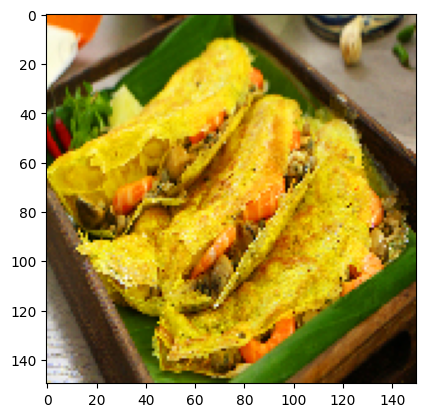

1/1 [==============================] - 0s 19ms/step
Xoi xeo


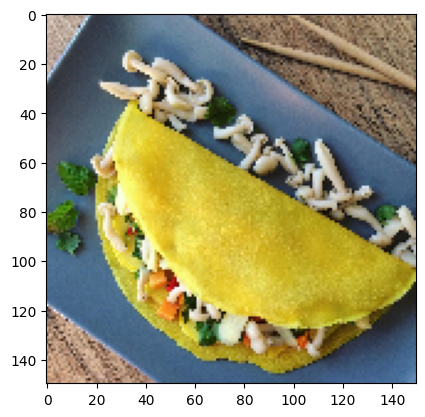

1/1 [==============================] - 0s 19ms/step
Bun bo Hue


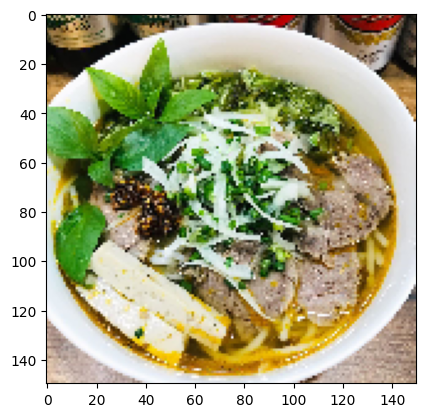

1/1 [==============================] - 0s 19ms/step
Bun bo Hue


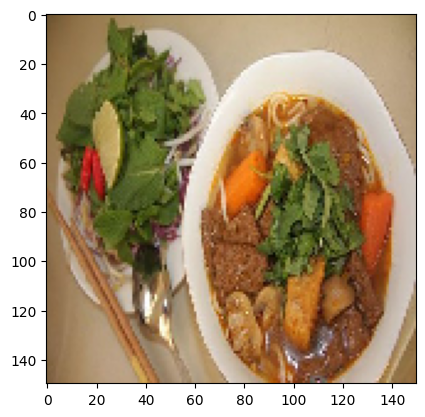

1/1 [==============================] - 0s 20ms/step
Bun bo Hue


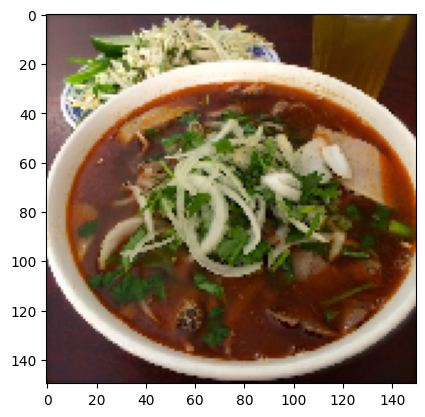

1/1 [==============================] - 0s 22ms/step
Bun dau mam tom


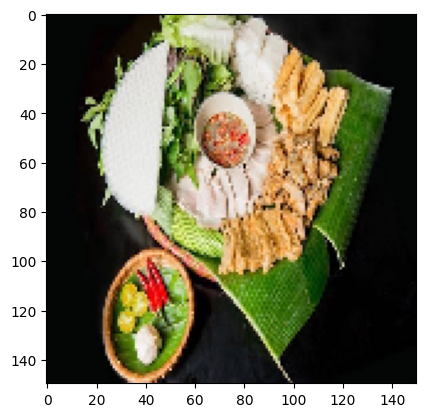

1/1 [==============================] - 0s 26ms/step
Bun dau mam tom


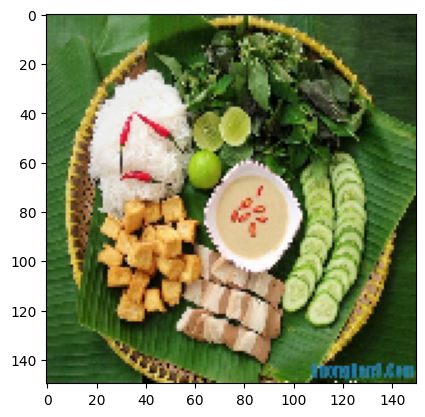

1/1 [==============================] - 0s 26ms/step
Com tam


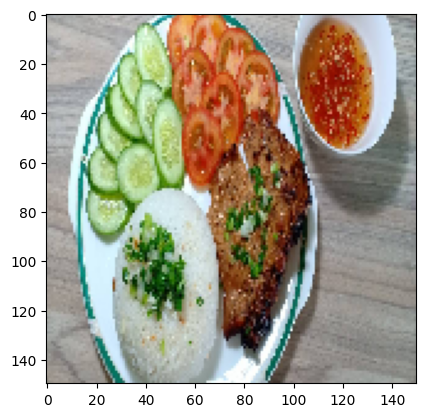

1/1 [==============================] - 0s 28ms/step
Com tam


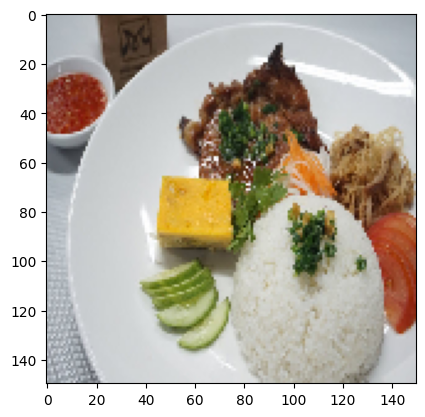

1/1 [==============================] - 0s 33ms/step
Com tam


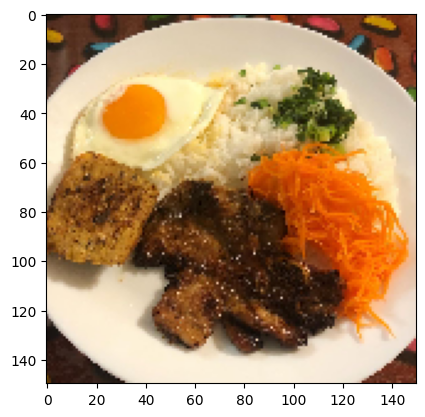

1/1 [==============================] - 0s 26ms/step
Com tam


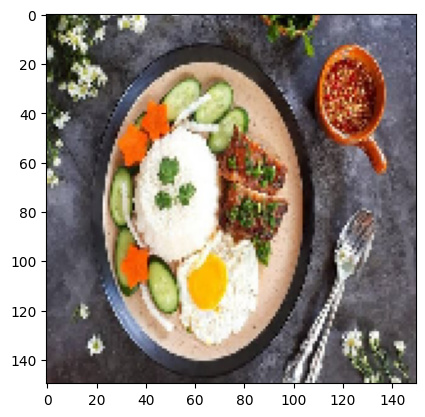

1/1 [==============================] - 0s 26ms/step
Xoi xeo


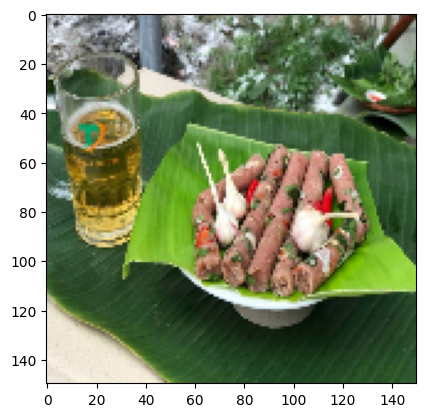

1/1 [==============================] - 0s 33ms/step
Banh bot loc


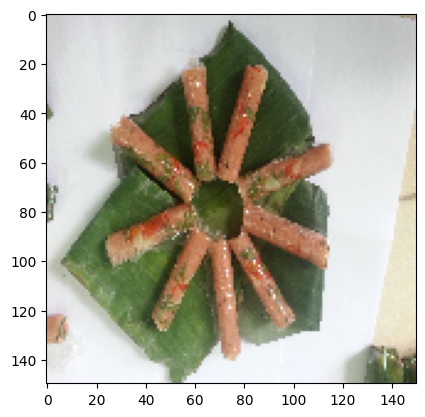

1/1 [==============================] - 0s 22ms/step
Xoi xeo


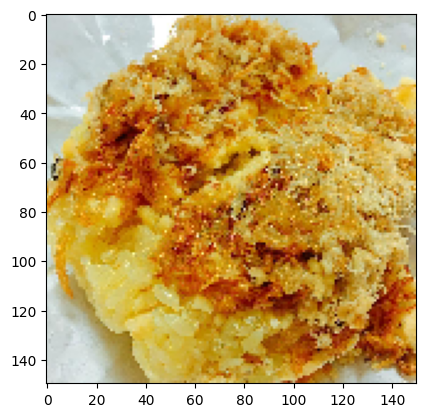

1/1 [==============================] - 0s 27ms/step
Xoi xeo


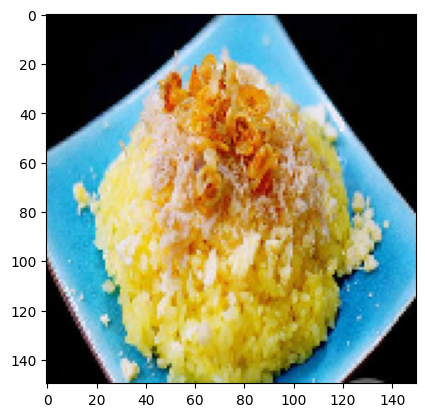

1/1 [==============================] - 0s 19ms/step
Xoi xeo


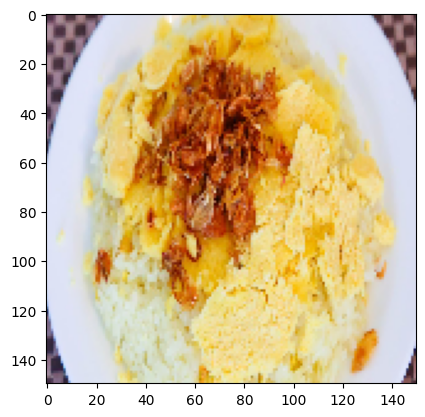

1/1 [==============================] - 0s 19ms/step
Nem chua


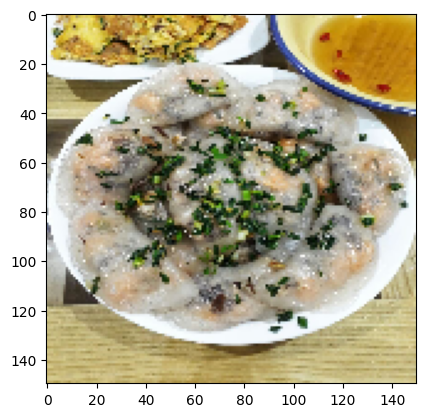

1/1 [==============================] - 0s 19ms/step
Banh chung


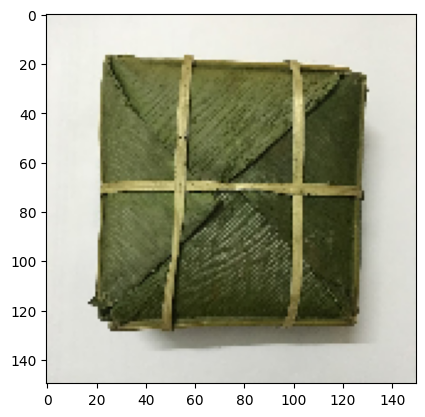

1/1 [==============================] - 0s 21ms/step
Banh chung


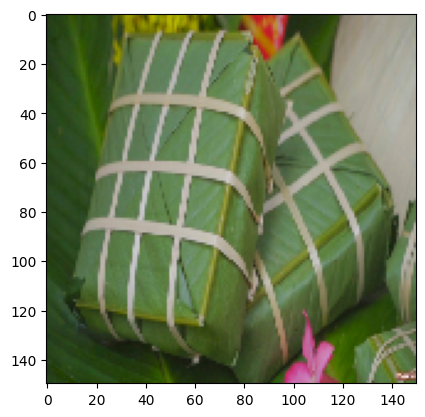

1/1 [==============================] - 0s 31ms/step
Banh chung


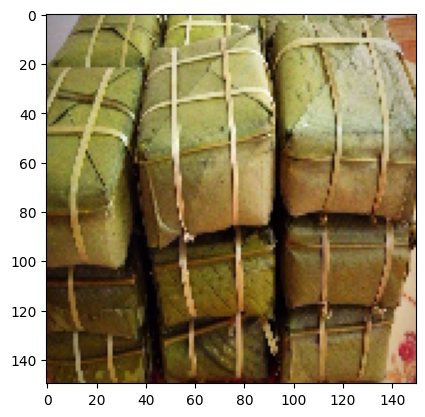

1/1 [==============================] - 0s 26ms/step
Banh chung


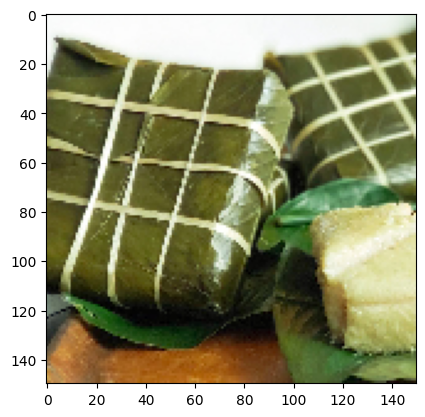

In [ ]:
#Testing
test="/content/drive/MyDrive/AI/10VietnameseDishes/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_CNN.predict(img),axis =1))

  class_name=['Banh bot loc','Banh chung','Banh mi','Banh trang nuong','Banh xeo','Bun bo Hue','Bun dau mam tom','Com tam','Nem chua','Xoi xeo']
  
  print(class_name[result])
  plt.show()